# Simulación Montecarlo
> El método de Montecarlo es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 y se mejoraron enormemente con el desarrollo de la computadora.

Referencia:
- https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo

___
## 0. Introducción

<img style="float: right; margin: 260px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Monte_carlo_method.svg/150px-Monte_carlo_method.svg.png" width="200px" height="400px" />

- Inventado por Stanislaw Ulam y a John von Neumann. Ulam ha explicado cómo se le ocurrió la idea mientras jugaba un solitario durante una enfermedad en 1946.
- Advirtió que resulta mucho más simple tener una idea del resultado general del solitario haciendo pruebas múltiples con las cartas y contando las proporciones de los resultados que computar todas las posibilidades de combinación formalmente.
- Se le ocurrió que esta misma observación debía aplicarse a su trabajo de Los Álamos sobre difusión de neutrones, para la cual resulta prácticamente imposible solucionar las ecuaciones íntegro-diferenciales que gobiernan la dispersión, la absorción y la fisión.
- Dado que ya  empezaban a estar disponibles máquinas de computación para efectuar las pruebas numéricas, el método cobró  mucha fuerza.
- El método de Montecarlo proporciona soluciones aproximadas a una gran variedad de problemas matemáticos posibilitando la realización de experimentos con muestreos de números pseudoaleatorios en una computadora. El método es aplicable a cualquier tipo de problema, ya sea estocástico o determinista.
- El método de Montecarlo tiene un error absoluto de la estimación que decrece como $\frac{1}{\sqrt{N}}$ en virtud del teorema del límite central.

### Ejemplo 1
Todos alguna vez hemos aplicado el método Montecarlo (inconscientemente). Como ejemplo, consideremos el juego de Astucia Naval.

Normalmente, primero se realizan una serie de tiros a puntos aleatorios. Una vez se impacta en un barco, se puede utilizar un algoritmo determinista para identificar la posición del barco y así terminar de derrumbarlo.

### Ejemplo 2
Los programas de diseño asistido por ordenador (CAD) pueden determinar rápidamente el volumen de modelos muy complejos. Estos modelos, en general, no tienen una expresión analítica para determinar su volumen y la única solución es dividir el modelo en un conjunto de pequeños submodelos cuyo volumen pueda determinarse (por ejemplo, dividir el modelo en miles de tetraedros). Sin embargo, esto consume muchos recursos. Por ello utilizan métodos de Montecarlo, más robustos y eficientes.

Como el software sí que conoce la expresión analítica de la geometría del modelo (posición de los nodos, aristas y superficies) puede determinar si un punto está dentro del modelo o está fuera con un coste mucho menor que el de determinar un volumen.

   + En primer lugar el software coloca el modelo dentro de un volumen conocido (por ejemplo, dentro de un cubo de $1 m^3$ de volumen).

   + A continuación, genera un punto aleatorio del interior del volumen conocido, y registra si el punto "ha caído" dentro o fuera del modelo. Esto se repite un gran número de veces (miles o millones), consiguiendo un registro muy grande de cuántos puntos han quedado dentro y cuántos fuera.

   + Como la probabilidad de que caiga dentro es proporcional al volumen del modelo, la proporción de puntos que han caído dentro con respecto al total de puntos generados es la misma proporción de volumen que ocupa el modelo dentro del cubo de $1 m^3$.

Si el $50\%$ de los puntos han caído dentro, el modelo ocupa el $50\%$ el volumen total, es decir, $0.5  m^3$. Evidentemente, cuantos más puntos genere el software, menor será el error de la estimación del volumen.

## 1. Generación de números pseudoaleatorios

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Dice.jpg" width="200px" height="100px" />

**Referencias de la clase:**
- https://webs.um.es/mpulido/miwiki/lib/exe/fetch.php?id=amio&cache=cache&media=wiki:simt1b.pdf
- http://www.lmpt.univ-tours.fr/~nicolis/Licence_NEW/08-09/boxmuller.pdf

**Referencias de las librerías que usaremos:**
- http://www.numpy.org/
- https://matplotlib.org/

___
### 1.1. Introducción

- Los números aleatorios son la base esencial de la simulación de escenarios.
- Toda la aleatoriedad involucrada en el modelo se obtiene a partir de un generador de números aleatorios que produce una sucesión de valores que supuestamente son realizaciones de una secuencia de variables aleatorias independientes e idénticamente distribuidas.

###  ¿Qué es un número pseudoaleatorio?

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.publicdomainpictures.net/pictures/50000/velka/random-numbers.jpg" width="200px" height="100px" />

- Es un número generado en un proceso que parece producir números al azar, pero no lo hace realmente.
- Las secuencias de números pseudoaleatorios no muestran ningún patrón o regularidad aparente desde un punto de vista estadístico, a pesar de haber sido generadas por un algoritmo completamente determinista, en el que las mismas condiciones iniciales producen siempre el mismo resultado.
- Por lo general, el interés no radica en generar un solo número aleatorio, sino muchos, reunidos en lo que se conoce como secuencia aleatoria.

###  ¿En qué se aplican?

- Modelado y simulación por computadora, estadística, diseño experimental. Normalmente, la entropía (aletoriedad) de los números que se generan actualmente basta para estas aplicaciones.
- Criptografía. Este campo sigue estando en constante investigación, y por tanto la generación de números aleatorios también.
- Asimismo, también destacan su uso en el llamado método de Montecarlo, con múltiples utilidades.
- Entre otros...

###  Funcionamiento básico

- Elegir una semilla inicial (condición inicial) $x_0$.
- Generar una sucesión de valores $x_n$ mediante la relación de recurrencia $x_n=T(x_{n-1})$.

> Generalmente, esta secuencia es de números pseudoaleatorios $\mathcal{U}(0,1)$.

- Finalmente, se genera un número pseudoaleatorio con distribución deseada, definido a través de alguna relación $u_n=g(x_n)$.
- Estas sucesiones son periódicas. Es decir, en algún momento ocurrirá que $x_j = x_i$ para algún $j > i$.

###  ¿Cuándo un generador de números pseudoaleatorios es bueno?

- La sucesión de valores que proporcione deberı́a asemejarse a una sucesión de realizaciones independientes de una variable aleatoria $\mathcal{U}(0, 1)$.
- Los resultados deben ser reproducibles, en el sentido de que comenzando con la misma semilla inicial, debe ser capaz de reproducir la misma sucesión. Esto para poder probar diferentes alrternativas bajo las mismas condiciones y/o poder depurar fallos en el modelo.
- La sucesión de valores generados debe tener un periodo no repetitivo tan largo como sea posible.

___
## 1.2 Métodos congruenciales para generación de números pseudoaleatorios $\mathcal{U}(0,1)$

- Introducidos por Lehmer en 1951.
- Son los principales generadores de números pseudoaleatorios utilizados hoy en día.

### Descripción general del método

- Comienza con un valor inicial (semilla) $x_0$, y los valores subsiguientes, $x_n$ para $n \geq 1$, se obtienen recursivamente con la siguiente fórmula:
$$x_n = (ax_{n−1} + b) \mod m.$$
- En la fórmula de arriba $\text{mod}$ representa la operación residuo.
- Los enteros positivos $m$, $a$ y $b$ en la fórmula se denominan:
 - $0<m$ es el módulo,
 - $0<a<m$ es el multiplicador, y
 - $0\leq b <m$ es el incremento.
 - La semilla debe satisfacer $0\leq x_0<m$.
- Si $b = 0$, el generador se denomina multiplicativo.
- En caso contrario se llama mixto.

**Ejemplo**

Para tomar intuición con este método, probar a mano con los siguientes conjuntos de parámetros:
1. $m=9$, $a=5$, $b=1$, $x_0=1$.

In [ ]:
x=1         # x0
m,a,b=9,5,1

In [ ]:
x=(a*x+b) % m # %  ->  operador módulo
x

1

2. $m=16$, $a=5$, $b=3$, $x_0=7$.

In [ ]:
x=7
m,a,b=16,5,3

In [ ]:
x=(a*x+b)%m
x

8

1. Son listas de números que se repiten.
2. Como máximo se repiten cada $m$ (módulo). Hay que tomar $m$ grande.
3. Son números enteros entre $0$ y $m$. Para que estén entre $0$ y $1$ hay que dividirlos entre $m$.

En efecto, un generador congruencial queda completamente determinado por los parámetros $m$, $a$, $b$ y $x_0$.

**Proposición.** Los valores generados por un método congruencial verifican:

$$x_n = \left(a^n x_0+b\frac{a^n-1}{a-1}\right) \mod m.$$


### Programemos este método

De acuerdo a lo descrito arriba, quisiéramos programar una función que reciba:
- la semilla $x_0$,
- el multiplicador $a$,
- el incremento $b$,
- el módulo $m$, y
- la cantidad de elementos de la secuencia pseudoaleatoria requeridos $n$,

y que retorne la secuencia pseudoaleatoria de longitud $n$.

In [ ]:
import numpy as np

In [ ]:
def congruencial(x0,a,b,m,n):
  N=np.linspace(1,n,n)
  xn=(a**N*x0+b*(a**N-1)/(a-1))%m
  return xn

In [ ]:
a,b,m=5,3,16
congruencial(7,a,b,m,20)

array([ 6.,  1.,  8., 11., 10.,  5., 12., 15., 14.,  9.,  0.,  3.,  2.,
       13.,  4.,  7.,  6.,  1.,  8., 11.])

In [ ]:
a,b,m=5,1,9
congruencial(1,a,b,m,20)

array([6., 4., 3., 7., 0., 1., 6., 4., 3., 7., 0., 1., 6., 4., 3., 7., 0.,
       1., 6., 4.])

**Ejemplo**

Probar con los conjuntos de parámetros anteriores:
1. $m=9$, $a=5$, $b=1$, $x_0=1$.
2. $m=16$, $a=5$, $b=3$, $x_0=7$.

Además,
- Para el conjunto de parámetros 1, probar con las semillas $x_0=5,8$.
- Para el conjunto de parámetros 2, probar con diferentes semillas.

In [ ]:
congruencial(2,a,b,m,9)

array([2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
congruencial(5,a,b,m,9)

array([8., 5., 8., 5., 8., 5., 8., 5., 8.])

**Ejemplo**

Los ciclos *for* o *while* son un atentado contra la computación eficiente. Programar de forma vectorizada usando la fórmila:
$$x_n = \left(a^n x_0+b\frac{a^n-1}{a-1}\right) \mod m.$$

In [ ]:
a,b,m=5,3,16
congruencial(7,a,b,m,200)

array([ 6.,  1.,  8., 11., 10.,  5., 12., 15., 14.,  9.,  0.,  3.,  2.,
       13.,  4.,  7.,  6.,  1.,  8., 11., 10.,  8.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

Entonces vemos que la calidad de nuestro generador congruencial depende fuertemente de la elección de los parámetros, pues quisiéramos que los periodos sean lo más grandes posible ($m$).

Cuando el periodo de un generador congruencial coincide con el módulo $m$, lo llamaremos *generador de ciclo completo*. El periodo de este tipo de generadores es independiente de la semilla que utilicemos.

El siguiente Teorema nos da condiciones para crear generadores de ciclo completo:

**Teorema.** Un generador congruencial tiene periodo completo si y sólo si se cumplen las siguientes condiciones:
1. $m$ y $b$ son primos entre sı́.
2. Si $q$ es un número primo que divide a $m$, entonces $q$ divide a $a − 1$.
3. Si $4$ divide a m, entonces 4 divide a $a − 1$.

**Ejercicio**

Comprobar el teorema en el conjunto de parámetros 2.

### Comentarios adicionales sobre el generador congruencial

Hasta ahora solo nos basamos en aspectos teóricos para ver si un generador es bueno. También hay aspectos computacionales...

En ese sentido los generadores multiplicativos son más eficientes que los mixtos porque se ahorran la operación de suma. Sin embargo, por el **Teorema** <font color=red>¿qué pasa con los generadores multiplicativos?</font>

De igual forma, una elección computacionalmente adecuada es $m=2^k$ (se elige m grande para tener periodos grandes). Con esta elección, y $k\geq2$, el generador tendrá periodo completo si y sólo si $b$ es impar y $1 = a \mod 4$.

Si se combina lo anterior (generador multiplicativo con $m=2^k$), obtenemos que el periodo máximo que se puede obtener es una cuarta parte de $m$, $\frac{2^k}{4}=2^{k-2}$ y se alcanza únicamente para $x_0$ impar y, $3 = a \mod 8$ o $5 = a \mod 8$.

Un generador multiplicativo muy utilizado, conocido como *RANDU*, tomaba $m = 2^{31}$ y $a = 2^{16} + 3$. Sin embargo, se ha demostrado que tiene propiedades estadı́sticas bastante malas.

Los generadores multiplicativos más famosos utilizados por IBM tomaban $m = 2^{31} − 1$ y $a = 7^5, 630360016$.

Pueden encontrar más información en este [enlace](https://en.wikipedia.org/wiki/Linear_congruential_generator).

- Se pueden hacer combinaciones de generadores y otros generadores más complicados...

**Ejemplo**

Tomar los parámetros $m=2^{31} − 1$, $a=1103515245$ y $b=12345$, y generar una secuencia pseudoaleatoria uniforme estándar de $n=10^4$ elementos.

Luego, dibujar el histograma (diagrama de frecuencias). ¿Corresponde lo obtenido con lo que se imaginaban?

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
m,a,b=2**31-1,1103515245,12345
n=10**4

In [27]:
def congruencial(x0,a,b,m,n):
  x=[x0]
  for i in range(n):
    x.append((a*x[-1]+b)%m)
  return np.array(x[1:])/m # Omitimos el primer elemento de 'x' y lo dividimos entre 'm' para generar U(0,1)

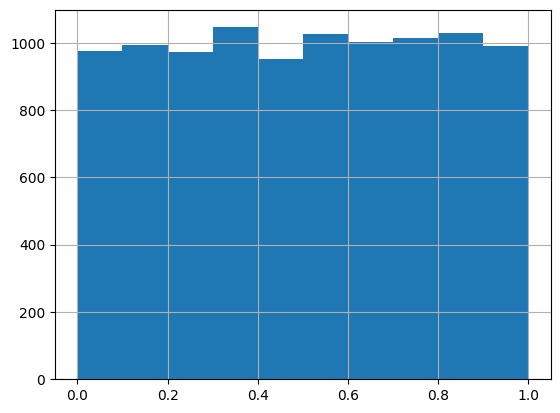

In [30]:
x=congruencial(0,a,b,m,n)
plt.hist(x) # Histograma
plt.grid()

**Ejemplo**

¿Cómo hacer para obtener secuencias pseudoaleatorias en $\mathcal{U}(a,b)$?

Realizar un código para esto. Hacer una prueba con los parámetros anteriormente tomados y dibujar el histograma para contrastar.

**Ejemplo**

Escribir una función que devuelva secuencias de números aleatorios $\mathcal{U}(0,1)$ usando los parámetros dados anteriormente y que use como semilla `time.time()`.

___
## 1.3 Método Box–Muller para generación de números pseudoaleatorios $\mathcal{N}(0,1)$

Teniendo dos secuencias de números pseudoaleatorios independientes e uniformemente distribuidos en el intervalo $\left[0,1\right]$ ($\mathcal{U}(0,1)$) es posible generar dos secuencias  de números pseudoaleatorios independientes y normalmente distribuidos con media cero y varianza unitaria ($\mathcal{N}(0,1)$).

Este método se conoce como el método Box–Muller.

Supongamos que $U_1$ y $U_2$ son variables aleatorias independientes que están uniformemente distribuidas en el intervalo $\left[0,1\right]$. Sean entonces:

$$X=R\cos(\theta)=\sqrt{-2\log(U_1)}\cos(2\pi U_2),$$

y

$$Y=R\sin(\theta)=\sqrt{-2\log(U_1)}\sin(2\pi U_2).$$

Entonces, $X$ y $Y$ son variables aleatorias independientes con una distribución normal estándar ($\mathcal{N}(0,1)$).

La derivación de esto se basa en la transformación del sistema cartesiano al sistema polar.

**Ejemplo**

Escribir una función que devuelva secuencias de números aleatorios $\mathcal{N}(0,1)$.

*Usar la función escrita anteriormente*

**Ejemplo**

Generar una secuencia pseudoaleatoria normal estándar de $n=10^4$ elementos.

Luego, dibujar el histograma (diagrama de frecuencias). ¿Corresponde lo obtenido con lo que se imaginaban?

**Ejemplo**

¿Cómo hacer para obtener secuencias pseudoaleatorias en $\mathcal{N}(\mu,\sigma)$?

Realizar un código para esto. Hacer una prueba y dibujar el histograma para contrastar.

Finalmente, mostrar que funciones de este tipo ya están en `numpy`. Ya sabemos como se obtienen.